Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

Carrefando bibliotecas a serem utilizadas na análise e definindo paramentros fixos

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fonte_titulo_grafico = {"size":34}

query_70 = "Ano <= 1979"
query_80 = "Ano >= 1980 & Ano <= 1989"
query_90 = "Ano >= 1990 & Ano <= 1999"
query_00 = "Ano >= 2000 & Ano <= 2009"
query_10 = "Ano >= 2010"



## Análise dos dados:


Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

# Pra iniciar a análise da base de dados irei carregar o total de óbitos por ano e identificar quais anos teve um número fora da curva e tentar relacionar com eventos que acontecerem nesses anos.




In [230]:
fonte = "../dados/obitos-registro-civil.csv"

dados_original = pd.read_csv(fonte)

dados_original.rename(columns = {"year":"Ano","month":"Mês","state":"Estado","deaths":"Mortes"},inplace = True)
dados_original.query("Ano == '2020'")


,Ano,Mês,Estado,Mortes
14814,2020,1,AC,373
14815,2020,1,AL,1588
14816,2020,1,AP,283
14817,2020,1,AM,1337
14818,2020,1,BA,6854
...,...,...,...,...
15025,2020,8,RR,86
15026,2020,8,SC,4666
15027,2020,8,SP,31782
15028,2020,8,SE,1452


Retirei o ano 2020 para a esta análise inicial por não estar completo.

In [231]:
dados_original_sem_2020 = dados_original.query("Ano != 2020")
dados_original_sem_2020

,Ano,Mês,Estado,Mortes
0,1970,1,AM,1
1,1970,1,BA,6
2,1970,1,CE,9
3,1970,1,DF,52
4,1970,1,ES,65
...,...,...,...,...
14809,2019,12,RR,186
14810,2019,12,SC,3157
14811,2019,12,SP,22863
14812,2019,12,SE,1031


In [232]:
mortes_por_ano = dados_original_sem_2020[["Ano","Mortes"]].groupby("Ano").sum()
mortes_por_ano.head()

,Mortes
Ano,
1970,272214
1971,281565
1972,288090
1973,316849
1974,316573


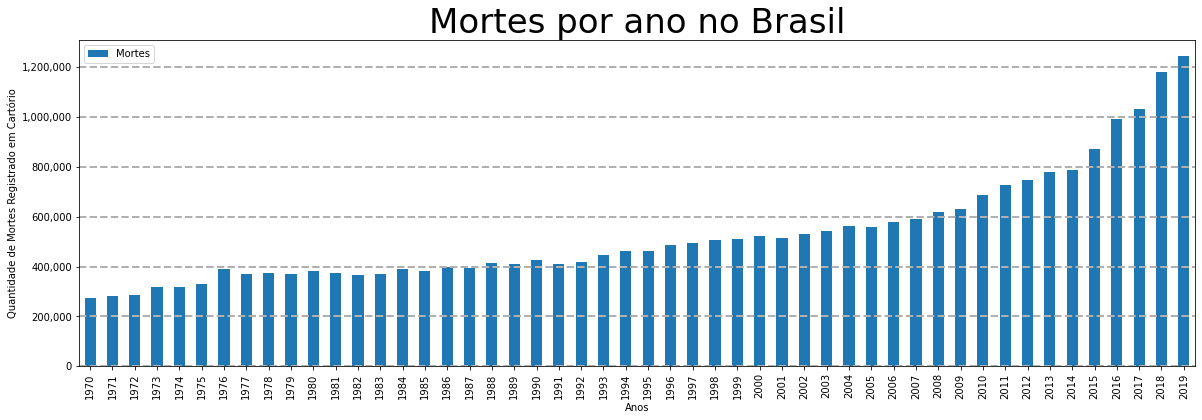

In [233]:


ax = mortes_por_ano.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_title("Mortes por ano no Brasil",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)
plt.show()



# Podemos observar no gráfico que os anos que se detacam com um maior variação do número de mortes são 1976,2016,2018. 
# Não consegui relacionar com nenhum tipo evento de saúde publica que aconteceu no Brasil nesses anos que destaram até o momento.

# Apartir daqui vou separar os dados por década para tentar identificar alguma variação dicrepante e tentar responder o motivo do crescimento de mortes ao longos dos anos



In [234]:
mortes_por_decada_70 = mortes_por_ano.query(query_70)
mortes_por_decada_80 = mortes_por_ano.query(query_80)
mortes_por_decada_90 = mortes_por_ano.query(query_90)
mortes_por_decada_00 = mortes_por_ano.query(query_00)
mortes_por_decada_10 = mortes_por_ano.query(query_10)

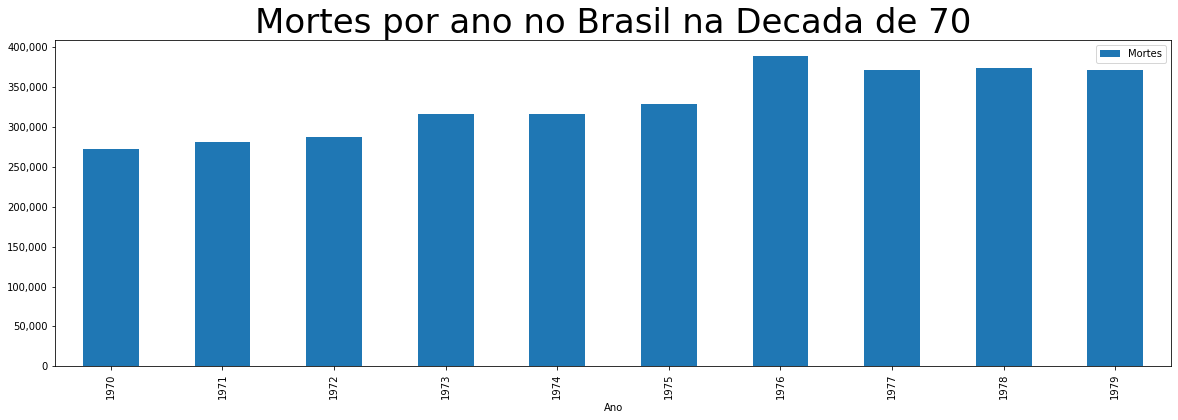

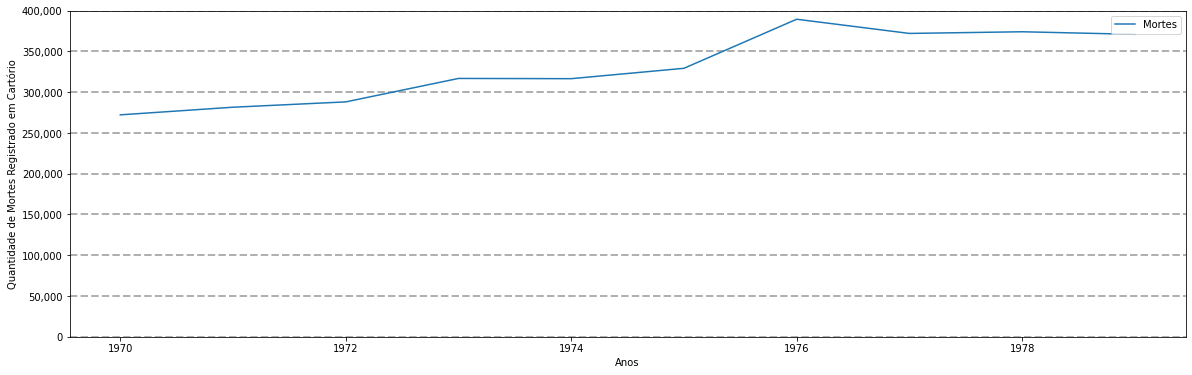

In [235]:
ax = mortes_por_decada_70.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax2 = mortes_por_decada_70.plot(kind="line",figsize=(20,6))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0,400000)

ax.set_title("Mortes por ano no Brasil na Decada de 70",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)

plt.show()

# No grafico dos de 1970 a 1979 podemos observar e confirmar que realmente no ano de 1976 houve um saldo fora curva em realaçao aos outros anos.
Em pesquisa indentifiquei que foi nesse ano que foi implantando o SIM - Sistema de Informações sobre Mortalidade.
 http://aprendis.gim.med.up.pt/index.php/Sistema_de_Informa%C3%A7%C3%A3o_sobre_Mortalidade#:~:text=O%20SIM%20foi%20criado%20pelo,de%20cerca%20de%20seis%20anos)

 Séra que com a implantação desse sistema contribui para esse aumento de notificação de mortes?

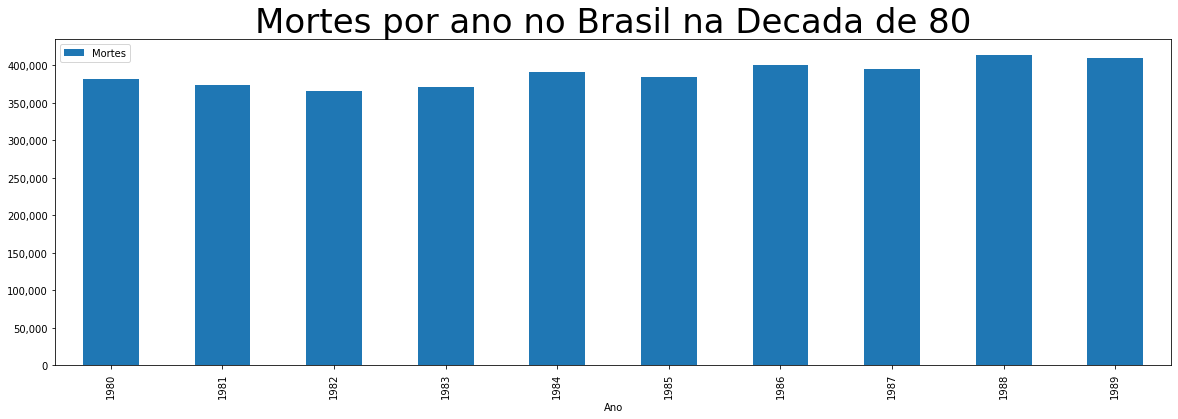

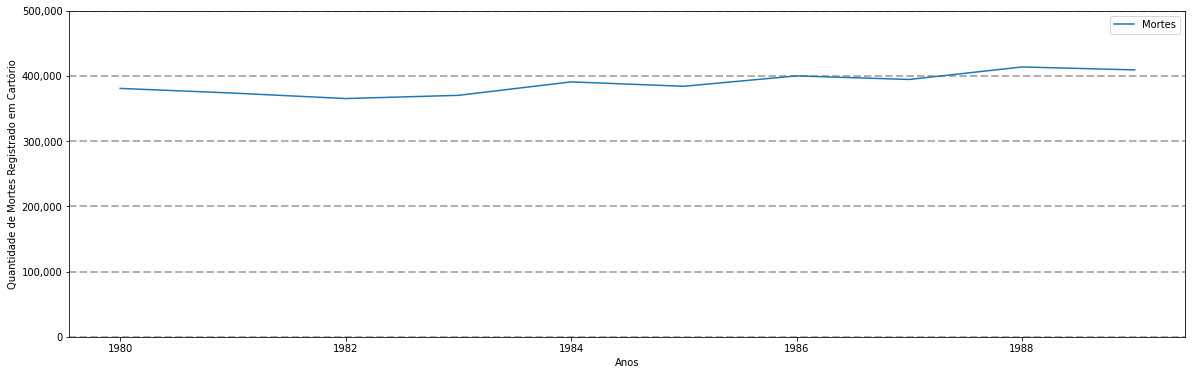

In [236]:
ax = mortes_por_decada_80.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax2 = mortes_por_decada_80.plot(kind="line",figsize=(20,6))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0,500000)

ax.set_title("Mortes por ano no Brasil na Decada de 80",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)
plt.show()

# De 1980 até 1989 não identifique nehuma variação que se detaca.

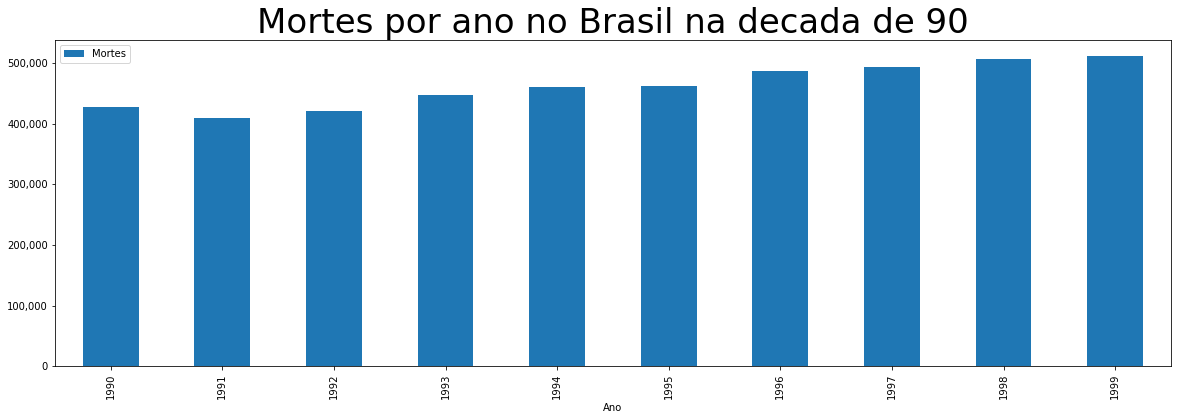

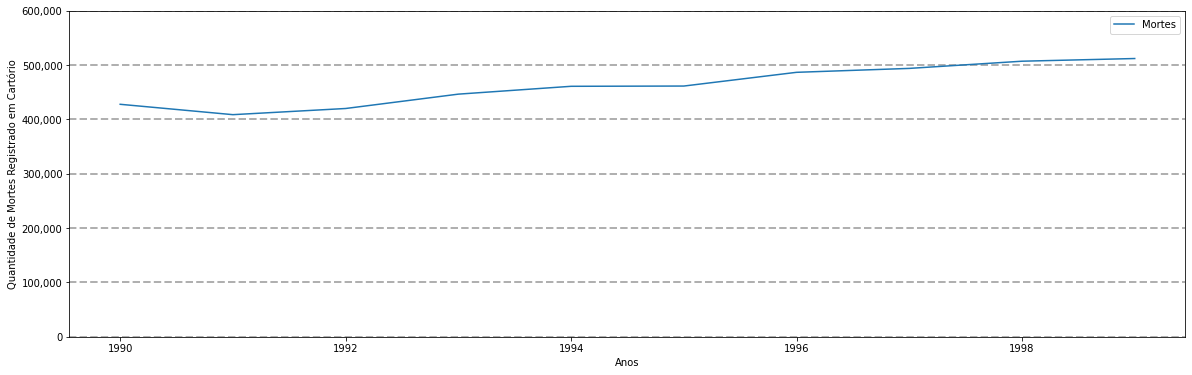

In [237]:
ax = mortes_por_decada_90.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax2 = mortes_por_decada_90.plot(kind="line",figsize=(20,6))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0,600000)

ax.set_title("Mortes por ano no Brasil na decada de 90",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)
plt.show()

# De 1990 até 1999 identifiquei um crescimento linerar sem nehuma variação que se detaca.

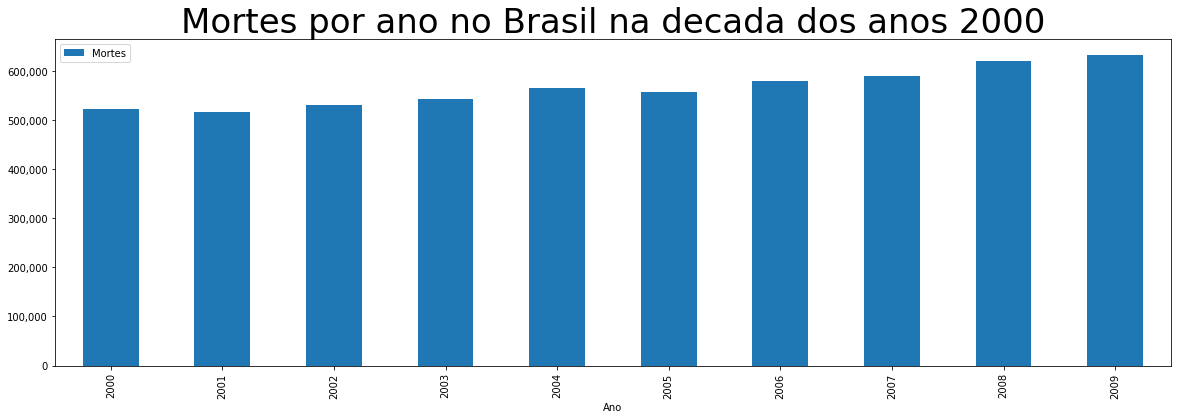

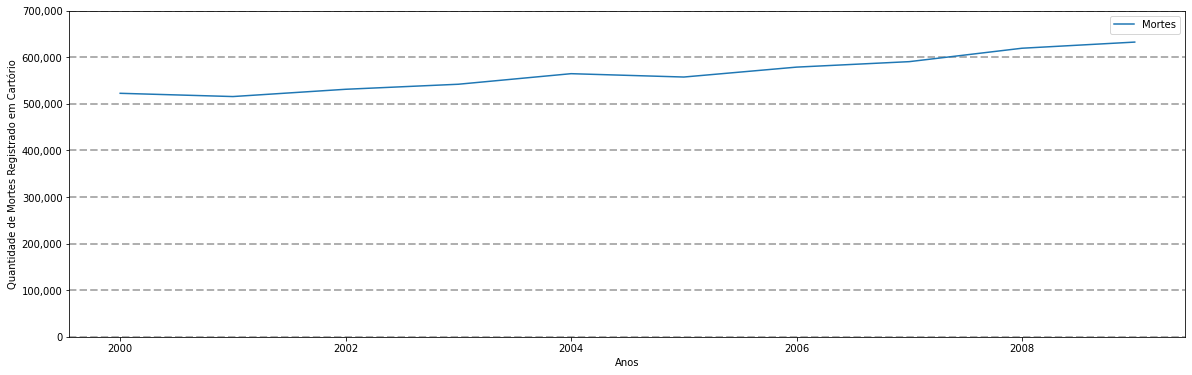

In [238]:
ax = mortes_por_decada_00.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax2 = mortes_por_decada_00.plot(kind="line",figsize=(20,6))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0,700000)

ax.set_title("Mortes por ano no Brasil na decada dos anos 2000",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)
plt.show()

# De 2000 até 2009 também identifiquei um crescimento linear sem nehuma variação que se destaca.

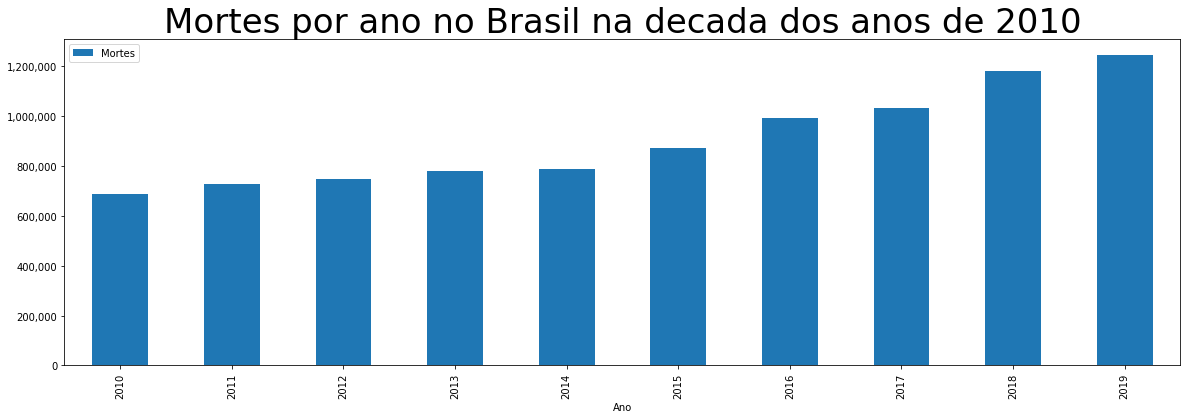

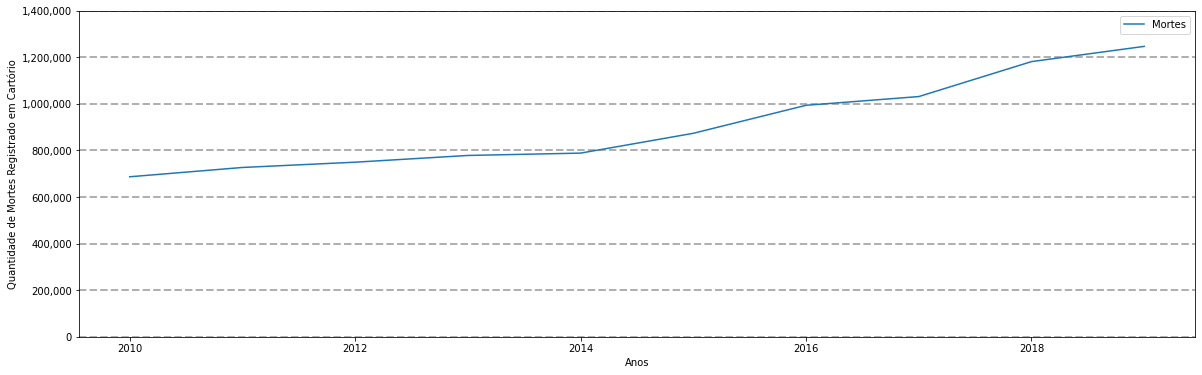

In [239]:
ax = mortes_por_decada_10.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax2 = mortes_por_decada_10.plot(kind="line",figsize=(20,6))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0,1400000)

ax.set_title("Mortes por ano no Brasil na decada dos anos de 2010",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)
plt.show()

# De 2010 até 2019 identifiquei um crescimento linear com um crescimento maior das outras decadas.



# Para demonstrar de uma melhor forma a varição entre as decadas irei plotar boxplot de todas as decadas

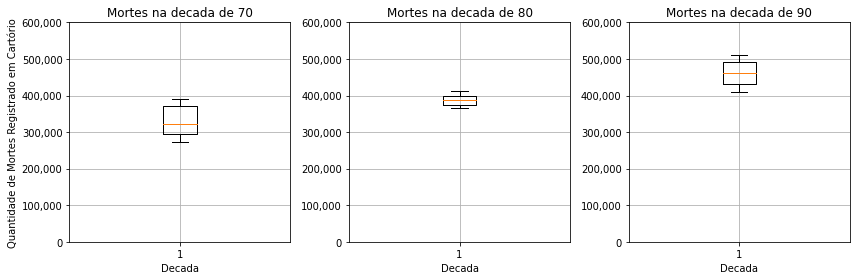

In [240]:

fig,ax =  plt.subplots(1,3,figsize = (12,4))

ax[0].boxplot(mortes_por_decada_70)
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[0].set_title("Mortes na decada de 70")
ax[0].grid(True)
ax[0].set_ylim(0,600000)
ax[0].set_xlabel("Decada")
ax[0].set_ylabel("Quantidade de Mortes Registrado em Cartório")

ax[1].boxplot(mortes_por_decada_80)
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[1].set_title("Mortes na decada de 80")
ax[1].grid(True)
ax[1].set_ylim(0,600000)
ax[1].set_xlabel("Decada")

ax[2].boxplot(mortes_por_decada_90)
ax[2].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[2].set_title("Mortes na decada de 90")
ax[2].grid(True)
ax[2].set_ylim(0,600000)
ax[2].set_xlabel("Decada")


fig.tight_layout()
plt.show()

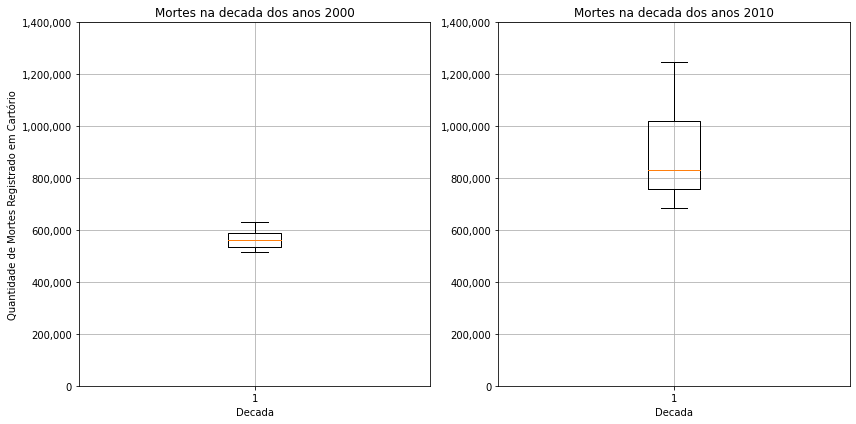

In [241]:
fig,ax =  plt.subplots(1,2,figsize = (12,6))

ax[0].boxplot(mortes_por_decada_00)
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[0].set_title("Mortes na decada dos anos 2000")
ax[0].grid(True)
ax[0].set_ylim(0,1400000)
ax[0].set_xlabel("Decada")
ax[0].set_ylabel("Quantidade de Mortes Registrado em Cartório")

ax[1].boxplot(mortes_por_decada_10)
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[1].set_title("Mortes na decada dos anos 2010")
ax[1].grid(True)
ax[1].set_ylim(0,1400000)
ax[1].set_xlabel("Decada")


fig.tight_layout()
plt.show()

# Podemos visualizar que o período que se destaca com relação em maior variação entre os anos é o período de 2010 a 2019.
# Tal crescimento deve ao aumento da populaçao com idade avaçada?
# Qual outro motivo pode pode explicar esse aumento?

# Será analizado agora a quantidade de mortes por estados de 1970 a 2019

In [242]:
total_mortes_por_estado = dados_original_sem_2020[["Estado","Mortes"]].groupby(["Estado"]).sum().sort_values("Mortes",ascending=False)
total_mortes_por_estado.head()

,Mortes
Estado,
SP,11226341
MG,4104171
PR,2579750
PE,2387868
RS,913149


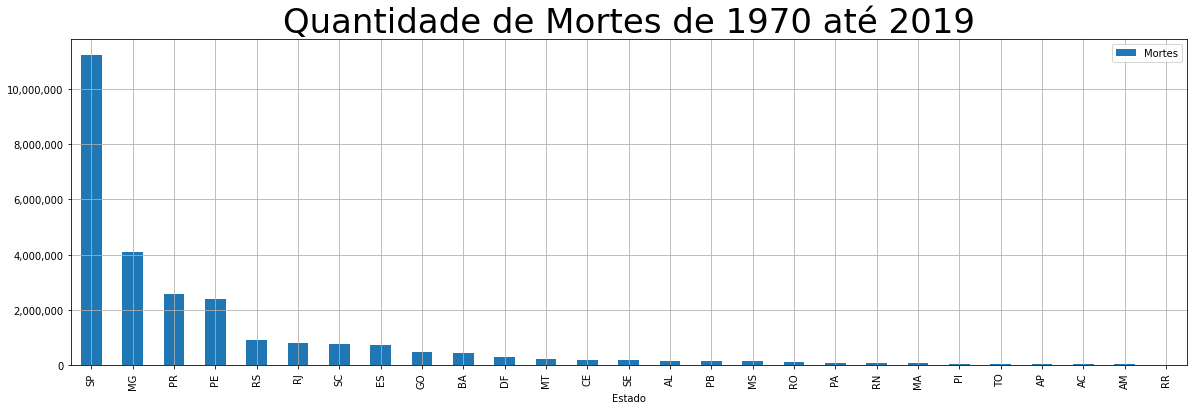

In [243]:
ax = total_mortes_por_estado.plot(kind="bar",figsize=(20,6),grid=True)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.title("Quantidade de Mortes de 1970 até 2019",fontdict=fonte_titulo_grafico)

plt.show()

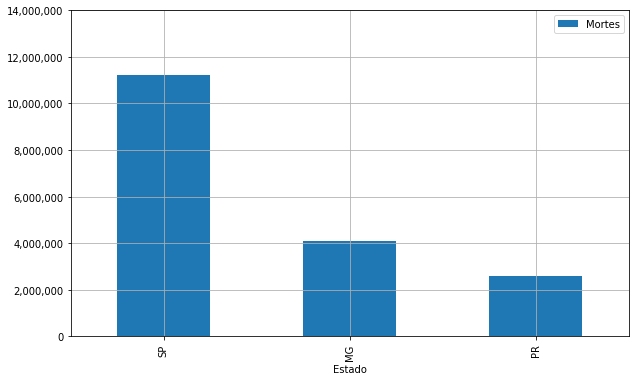

In [244]:
ax = total_mortes_por_estado.query("Estado in ['SP','MG','PR']").plot(kind="bar",figsize=(10,6),grid=True)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_ylim(0,14000000)
plt.show()

# Como podemos observar nos gráfico SP é quase 3 vezes mais mortes do que o segundo estado com maior números de morte que é Minas Gerais

# Agora iremos comparar a soma da mortes de todos os estados com o estado de SP, que é onde está concentrato as mortes

In [245]:
dados_mortes_sp_versus_outros_estados = dados_original_sem_2020.query("Estado != 'SP'")[["Ano","Mortes"]].groupby("Ano").sum()
dados_mortes_sp_versus_outros_estados["Mortes SP"] = dados_original_sem_2020.query("Estado == 'SP'")[["Ano","Mortes"]].groupby("Ano").sum()
dados_mortes_sp_versus_outros_estados.head()

,Mortes,Mortes SP
Ano,,
1970,109972,162242
1971,111753,169812
1972,112569,175521
1973,128113,188736
1974,123727,192846


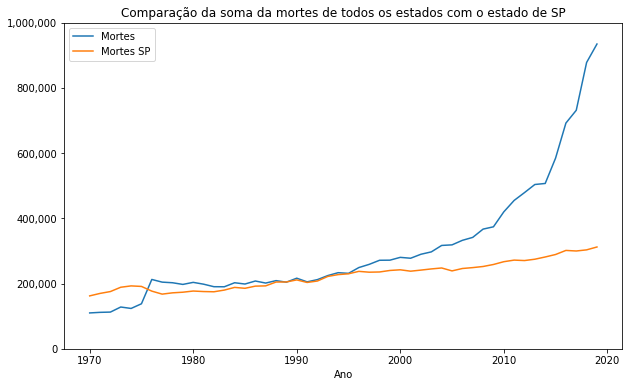

In [246]:
ax = dados_mortes_sp_versus_outros_estados.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title("Comparação da soma da mortes de todos os estados com o estado de SP")
plt.ylim(0,1000000)
plt.show()


<AxesSubplot:xlabel='Ano'>

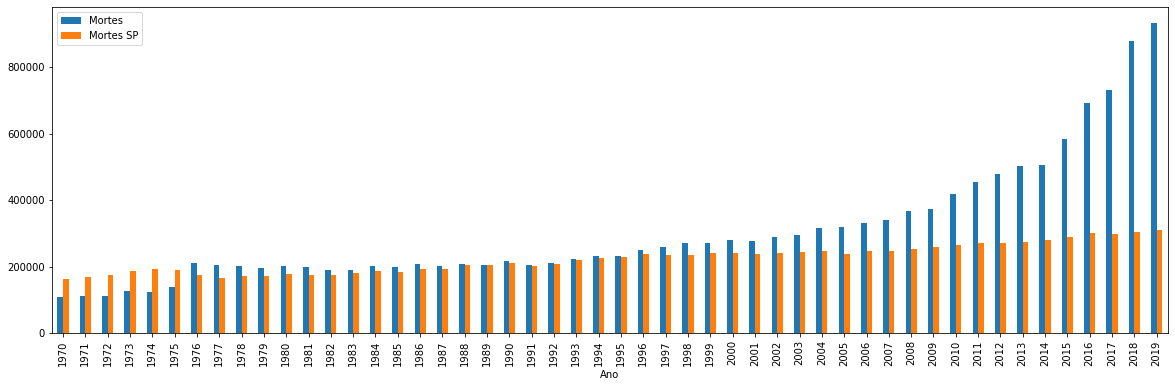

In [247]:
dados_mortes_sp_versus_outros_estados.plot(kind="bar",figsize=(20,6))

# Podemos observar que de 1970 a 1975 tinha mais mortes no estado de SP do que em todos os estados somados, em 1976 houve uma mudança brusca. Do ano de 1977 a 1997 a comparação fica equilibrada e apartir de 1998 o números da soma das mortes nos outros estados aumenta muito enquanto que as mortes em SP tem uma leve aumento chegando em 2019 quase que 3 vezes menos morte do que a soma de todos os estados.





# Irei plotar um gráfico da evolução dos estados com maios mortes para identificar se algum se destaca no aumento de mortes

In [248]:
estados_mais_mortes = dados_original_sem_2020[["Mortes","Estado"]].groupby(["Estado"]).sum().sort_values("Mortes",ascending=False).head(7)
estados_mais_mortes.reset_index(inplace=True)
estados = estados_mais_mortes["Estado"]
estados = estados.tolist()
estados

['SP', 'MG', 'PR', 'PE', 'RS', 'RJ', 'SC']

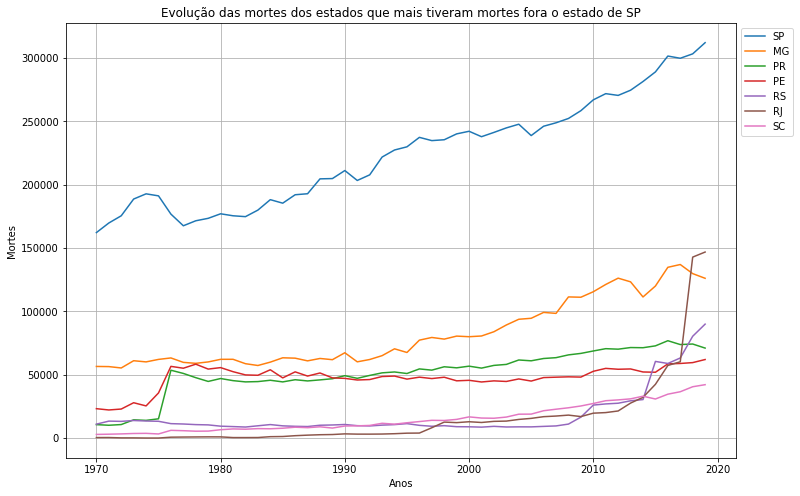

In [249]:

dados_estado = dados_original_sem_2020[["Ano","Mortes","Estado"]].groupby(["Ano","Estado"]).sum()
dados_estado.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(12,8))

for estado in estados:
    query_estado = f"Estado == '{estado}'"
    ax.plot(dados_estado.query(query_estado)["Ano"],dados_estado.query(query_estado)["Mortes"],label=estado)
    
plt.xlabel("Anos")
plt.ylabel("Mortes")
plt.title("Evolução das mortes dos estados que mais tiveram mortes fora o estado de SP")

ax.legend(loc="best",bbox_to_anchor=(1, 1))
plt.grid()

plt.show()

# Podemos destacar os picos de mortes nos estados de Pernambuco Paraná em 1976, um pico também do estado do Rio de Janeiro em 2017 e um constante aumento de mortes do estados de MG ao passar dos anos.

In [250]:
dados_original_sem_2020[["Mês","Mortes"]].groupby("Mês").sum()

,Mortes
Mês,
1,2220674
2,1948268
3,2166870
4,2132069
5,2292921
6,2344159
7,2466421
8,2342946
9,2183548


<AxesSubplot:xlabel='Mês'>

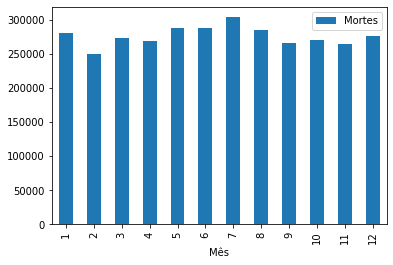

In [262]:
dados_original_sem_2020.query(query_70)[["Mês","Mortes"]].groupby("Mês").sum().plot(kind="bar")

In [252]:
dados_ano_2020 = dados_original.query("Ano == 2020")[["Mês","Estado","Mortes"]]
dados_ano_2020

,Mês,Estado,Mortes
14814,1,AC,373
14815,1,AL,1588
14816,1,AP,283
14817,1,AM,1337
14818,1,BA,6854
...,...,...,...
15025,8,RR,86
15026,8,SC,4666
15027,8,SP,31782
15028,8,SE,1452


In [253]:
dados_ano_2019 = dados_original.query("Ano == 2019 and Mês <= 8")[["Mês","Estado","Mortes"]]
dados_ano_2019

,Mês,Estado,Mortes
14490,1,AC,298
14491,1,AL,1382
14492,1,AP,285
14493,1,AM,1209
14494,1,BA,6564
...,...,...,...
14701,8,RR,221
14702,8,SC,3796
14703,8,SP,27518
14704,8,SE,1105


In [254]:
dados_2019_2020 = pd.merge(dados_ano_2019,dados_ano_2020[["Mês","Estado","Mortes"]],left_on=["Mês","Estado"],right_on=["Mês","Estado"])

In [255]:
dados_2019_2020

,Mês,Estado,Mortes_x,Mortes_y
0,1,AC,298,373
1,1,AL,1382,1588
2,1,AP,285,283
3,1,AM,1209,1337
4,1,BA,6564,6854
...,...,...,...,...
211,8,RR,221,86
212,8,SC,3796,4666
213,8,SP,27518,31782
214,8,SE,1105,1452


In [256]:
dados_2019_2020.rename(columns={"Mortes_x" : "Mortes 2019","Mortes_y" : "Mortes 2020"},inplace=True)
dados_2019_2020

,Mês,Estado,Mortes 2019,Mortes 2020
0,1,AC,298,373
1,1,AL,1382,1588
2,1,AP,285,283
3,1,AM,1209,1337
4,1,BA,6564,6854
...,...,...,...,...
211,8,RR,221,86
212,8,SC,3796,4666
213,8,SP,27518,31782
214,8,SE,1105,1452


<AxesSubplot:xlabel='Mês'>

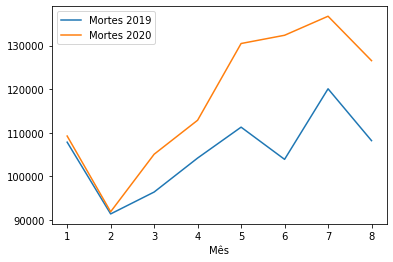

In [257]:
dados_2019_2020[["Mês","Mortes 2019","Mortes 2020"]].groupby("Mês").sum().plot()

<AxesSubplot:xlabel='Mês'>

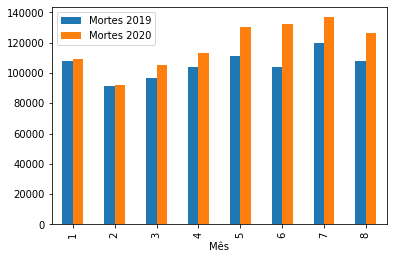

In [258]:
dados_2019_2020[["Mês","Mortes 2019","Mortes 2020"]].groupby("Mês").sum().plot(kind="bar")

<AxesSubplot:xlabel='Estado'>

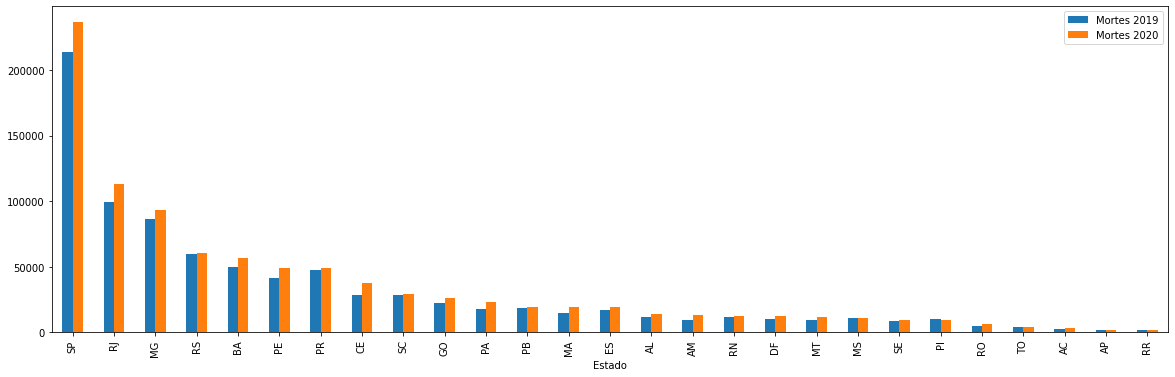

In [259]:
dados_2019_2020[["Estado","Mortes 2019","Mortes 2020"]].groupby("Estado").sum().sort_values("Mortes 2020",ascending=False).plot(kind="bar",figsize=(20,6))